In [31]:
import sunpy.map
import sunpy.coordinates
import astropy.units as u
import matplotlib.pyplot as plt

import astropy.constants as const

from astropy.coordinates import SkyCoord
from sunpy.coordinates import Heliocentric

r_1 = const.R_sun

# 1. Load the AIA image (replace with your actual file path)
aia_map = sunpy.map.Map("./observations/aia_lev1_171a_2012_07_19t10_14_11_34z_image_lev1.fits") 
# 2. Define the spacecraft coordinates (example using AIA)
# aia_lon = aia_map.heliographic_longitude
# aia_lat = aia_map.heliographic_latitude

aia_coords = aia_map.observer_coordinate
aia_cartesian = [aia_coords.cartesian.x,
                 aia_coords.cartesian.y,
                 aia_coords.cartesian.z]

target_lon = 91 * u.deg
target_lat = -14 * u.deg

target_coords = SkyCoord(lat=target_lat, 
                         lon=target_lon, 
                         frame=aia_coords.frame)

hgs_coord_xyz = SkyCoord(target_coords, representation_type='cartesian')


target_cartesian = [target_coords.cartesian.x,
                    target_coords.cartesian.y,
                    target_coords.cartesian.z]

hcc_frame = Heliocentric(observer=SkyCoord(
        lon=target_lon, lat=target_lat, radius=r_1, frame='heliographic_stonyhurst'))

los = SkyCoord(
    x=[aia_cartesian[0], target_cartesian[0]], 
    y=[aia_cartesian[1], target_cartesian[1]], 
    z=[aia_cartesian[2], target_cartesian[2]], 
    frame=hcc_frame
)

# 6. Plot the AIA image and overlay the ray
fig = plt.figure()
ax = fig.add_subplot(projection=aia_map)
aia_map.plot(axes=ax)
# line.plot(axes=ax, color='red')
ax.plot_coord(los, color='r', lw=2)

# 7. Customize the plot (optional)
ax.set_title("Ray from AIA to Target on Sun")
plt.show()

AttributeError: 'NoneType' object has no attribute 'physical_type'

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


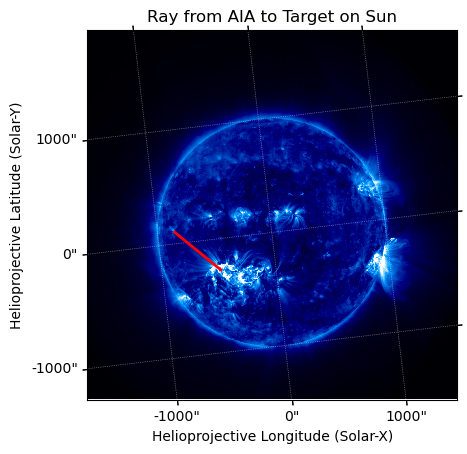

In [14]:
stereo_map = sunpy.map.Map("./observations/20120719_101400_n4eua.fts") 

# 6. Plot the AIA image and overlay the ray
fig = plt.figure()
ax = fig.add_subplot(projection=stereo_map)
stereo_map.plot(axes=ax)
# line.plot(axes=ax, color='red')
ax.plot_coord(los, color='r', lw=2)

# 7. Customize the plot (optional)
ax.set_title("Ray from AIA to Target on Sun")
plt.show()